# Trabajo Práctico 4 - Solana Cucher, Victoria Rosino, Florencia Ruiz

## Parte 1: Análisis de la base de hogares y cálculo de pobreza

In [1]:
#Importamos todas las librerias necesarias para el trabajo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Punto 1**

In [78]:
#Importamos la base de datos de usuarios_hogar
df_Hogar = pd.read_excel('usu_hogar_T123.xlsx')
#Nos quedamos con los aglomerados de CABA y GBA también para esta base de datos
df_Hogar = df_Hogar[(df_Hogar['AGLOMERADO']==32)|(df_Hogar['AGLOMERADO']==33)]
print(df_Hogar.head(5))

                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
9   TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
10  TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
11  TQSMNOSQRHLLTTCDEIJAH00719389  2023          1          1          1   
35  TQRMNORTUHKOQQCDEIJAH00780489  2023          1          1          1   
98  TQRMNOUTRHKNQMCDEIJAH00802590  2023          1          1          1   

    REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... GDECCFR  PDECCFR  ADECCFR  \
9        1       S          33     1066    1  ...    12.0      NaN       12   
10       1       S          33     2270    2  ...     6.0      NaN        7   
11       1       S          33     2161    1  ...     7.0      NaN        8   
35       1       S          33     3097    1  ...     8.0      NaN        9   
98       1       S          33     2571    1  ...     8.0      NaN        9   

   PONDIH  VII1_1  VII1_2  VII2_1  VII2_2 VII2_3  VII2_4  
9       0

**Punto 2**

In [79]:
#Importamos la base de microdatos de la EPH del primer trimestre de 2023
df_Ind = pd.read_excel("usu_individual_T123.xlsx")

#Unimos la base de datos de individuos con la de hogares 
df_IH = df_Ind.merge(df_Hogar, on = ['CODUSU', 'NRO_HOGAR'], how = 'right')
#Chequeamos la nueva base de datos
df_IH.head(20)

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,COMPONENTE,H15,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,...,GDECCFR_y,PDECCFR_y,ADECCFR_y,PONDIH_y,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,1,S,33,1066,...,12.0,NaN,12,0,1,0,98,0,0,0
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,2,1,1,S,33,1066,...,12.0,NaN,12,0,1,0,98,0,0,0
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,1,S,33,2270,...,6.0,NaN,7,4733,1,0,2,0,0,0
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,2,1,1,S,33,2270,...,6.0,NaN,7,4733,1,0,2,0,0,0
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,1,S,33,2161,...,7.0,NaN,8,2672,1,0,98,0,0,0
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,1,S,33,3097,...,8.0,NaN,9,4844,1,0,98,0,0,0
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,1,S,33,2571,...,8.0,NaN,9,3482,1,0,97,0,0,0
7,TQRMNOQQPHJMQUCDEIJAH00796386,2023,1,1,1,1,1,S,33,1540,...,12.0,NaN,12,0,1,0,98,0,0,0
8,TQRMNOSXXHKMQNCDEIJAH00780852,2023,1,1,1,1,1,S,33,350,...,1.0,NaN,1,753,2,0,3,6,0,0
9,TQRMNOSXXHKMQNCDEIJAH00780852,2023,1,1,2,1,1,S,33,350,...,1.0,NaN,1,753,2,0,3,6,0,0


**Punto 3**

Las funciones y métodos que usamos para limpiar la base de datos son los siguientes:
- Usamos el método ".drop" pertenenciente a los DataFrames en pandas para borrar las columnas duplicadas debido al *merge* de las bases de datos. También usamos este método para borrar columnas con más del 80% de *missing values*.
- Usamos la función "drop_duplicates()" de pandas para borrar las observaciones duplicadas, en caso de que lo hubieran.
- Usamos la función "df_IH.isnull()" de pandas para crea un DataFrame booleano que detecte los *missigs values*
- Usamos el método ".loc" para seleccionar aquellas columnas que tienen valores "99" o "9". Estas observaciones deben ser borradas ya que se tratan de *missings values*
- Usamos la función "sns.boxplot" del paquete seaborn para identificar visualmente, mediante un boxplot, si algunas las variables relevantes de ingresos tienen valores *outliers*. 
- Usamos el método "quantile()" de la biblioteca pandas para calcular el cuantil correspondiente al valor 0.25 y 0.74. Luego, creamos una máscara booleana que identifica las filas en las que los valores de ciertas variables están dentro del rango definido por los límites inferior y superior. Eliminamos los valores atípicos según el criterio del rango intercuartílico.
- Usamos el método ".astype()" de pandas para cambiar el tipo de datos de las columnas del DataFrame.

In [80]:
# 1)Observamos que existen columnas que están duplicadas en la base de datos, por lo que procedemos a quedarnos solo con una de ellas
for columna in df_IH: 
    print(columna)
    
df_IH.drop(df_IH.filter(regex='_x$').columns, axis=1, inplace=True)

# 2)Chequeamos si hay observaciones duplicadas y, una vez más, borramos las duplicadas
df_IH = df_IH.drop_duplicates()

CODUSU
ANO4_x
TRIMESTRE_x
NRO_HOGAR
COMPONENTE
H15
REGION_x
MAS_500_x
AGLOMERADO_x
PONDERA_x
CH03
CH04
CH05
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH14
CH15
CH15_COD
CH16
CH16_COD
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
IMPUTA
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
PP03C
PP03D
PP3E_TOT
PP3F_TOT
PP03G
PP03H
PP03I
PP03J
INTENSI
PP04A
PP04B_COD
PP04B1
PP04B2
PP04B3_MES
PP04B3_ANO
PP04B3_DIA
PP04C
PP04C99
PP04D_COD
PP04G
PP05B2_MES
PP05B2_ANO
PP05B2_DIA
PP05C_1
PP05C_2
PP05C_3
PP05E
PP05F
PP05H
PP06A
PP06C
PP06D
PP06E
PP06H
PP07A
PP07C
PP07D
PP07E
PP07F1
PP07F2
PP07F3
PP07F4
PP07F5
PP07G1
PP07G2
PP07G3
PP07G4
PP07G_59
PP07H
PP07I
PP07J
PP07K
PP08D1
PP08D4
PP08F1
PP08F2
PP08J1
PP08J2
PP08J3
PP09A
PP09A_ESP
PP09B
PP09C
PP09C_ESP
PP10A
PP10C
PP10D
PP10E
PP11A
PP11B_COD
PP11B1
PP11B2_MES
PP11B2_ANO
PP11B2_DIA
PP11C
PP11C99
PP11D_COD
PP11G_ANO
PP11G_MES
PP11G_DIA
PP11L
PP11L1
PP11M
PP11N
PP11O
PP11P
PP11Q
PP11R
PP11S
PP11T
P21
DECOCUR
IDECOCUR
RDECOCUR
GDECOCUR
PDE

In [81]:
# 3)Análizamos si hay observaciones atípicas y, a la vez, los missing values:

# a)Primero, chequeamos el porcentaje de valores faltantes para cada variable. 
# Vemos que alrededor del 80% de missing values en las variables,aproximadamente,se produce un salto. Es decir, el valor 80% de NA's es un buen punto de corte. 
percent_missing = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values = pd.DataFrame({'% Missings': percent_missing})
df_missing_values.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values.head(50)

,% Missings
PP09C_ESP,100.000000
PDECIFR_y,100.000000
PDECINDR,100.000000
IDECINDR,100.000000
PDECOCUR,100.000000
IDECOCUR,100.000000
PDECCFR_y,100.000000
IDECIFR_y,100.000000
IDECCFR_y,100.000000
IV3_ESP,99.855624


In [82]:
# Eliminamos del dataframe todas aquellas variablesa con más de 80% de valores faltantes.
min_count = int((80/100)*df_IH.shape[0] + 1) #El umbral es 6096 missings
min_count

# El siguiente comando localiza aquellas columnas que no cumplen con el umbral propuesto.
columnas_con_valores_faltantes = df_IH.columns[df_IH.isnull().sum() > min_count]
columnas_con_valores_faltantes
df_IH = df_IH.drop(columns=columnas_con_valores_faltantes)

# Chequeamos el dataframe
percent_missing2 = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values2 = pd.DataFrame({'% Missings': percent_missing2})
df_missing_values2.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values2.head(65)

,% Missings
PP06E,53.760336
PP05F,53.760336
PP07E,53.760336
PP07D,53.760336
PP07C,53.760336
PP07A,53.760336
PP06H,53.760336
PP06D,53.760336
PP06C,53.760336
PP06A,53.760336


In [83]:
# Filtramos las filas que tienen un 50% o más de missing.
columnas_mitad_missing = df_missing_values2[df_missing_values2['% Missings'] > 50]
pd.set_option('display.max_rows', None)
columnas_mitad_missing

# Chequeamos cuales son no categóricas para imputarle la media en los missings.
mitad_missing_no_cat = ['PP06D', 'PP06C', 'PP08D1', 'PP08J1', 'PP08J2', 'PP08J3', 'PP08F2', 'PP08F1', 'PP08D4', 'PP04B2', 'PP03D', 'PP3F_TOT', 'PP3E_TOT']
for columna in mitad_missing_no_cat:
    media = df_IH[columna].mean()  # Calcula la media de la columna
    df_IH[columna].fillna(media, inplace=True)  # Reemplaza los NA con la media

percent_missing3 = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values3 = pd.DataFrame({'% Missings': percent_missing3})
df_missing_values3.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values3

min_count_cat = int((50/100)*df_IH.shape[0] + 1)
min_count_cat
columnas_mitad_missing_cat = df_IH.columns[df_IH.isnull().sum() > min_count_cat]
columnas_mitad_missing_cat
df_IH = df_IH.drop(columns=columnas_mitad_missing_cat)

In [84]:
# b)Para analizar valores atípicos, calculamos los mínimos y máximos de ciertas variables
descrip_analisis = df_IH[['ITF_y','IPCF_y','P21','P47T','PONDIH_y','II1','IX_TOT','IX_MEN10', 'IX_MAYEQ10','DECIFR_y','CH06','DECOCUR']].describe()
print(descrip_analisis)

# Procedemos a eliminar las observaciones negativas de las variables: P21 (ingreso de la ocupación principal), P47T (ingreso total individual) y CH06 (edad)
df_IH = df_IH[(df_IH["P21"]>=0) & (df_IH["P47T"]>=0) & (df_IH["CH06"]>=0)]

# c)Siguiendo con el análisis de los valores atípicos, revisamos todos los valores que toman algunas otras variables relevantes (cuyos valores son finitos)
columnas_de_interes = ['IV1','IV3','IV8','II1','V2','V5','IX_TOT','IX_MEN10', 'IX_MAYEQ10','DECIFR_y','CH03','CH04','CH06','CH07','CH08','CH09','CH12','NIVEL_ED','ESTADO','CAT_INAC','DECOCUR']
for columna in df_IH.columns:
    valores_unicos = set(df_IH[columna])
    print(f"Valores únicos de {columna}: {valores_unicos}")
    
# Observamos que ciertas columnas incluyen valores como 9 o 99 que implican "no sabe/no contesta". En particular, las variables con un 99 son II1 y CH12; y las variables con 9 son V2, V5, CH07, CH09. 
# Decidimos eliminar estas observaciones ya que indican lo mismo que un missing value. 
variables_99 = ['II1','CH12','IV2','VII1_1']
df_IH = df_IH.loc[~df_IH[variables_99].eq(99).any(axis=1)]
variables_9 = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12', 'V13','V14','V15', 'V16', 'V17','V18','V19_A','V19_B','CH07', 'CH08', 'CH10', 'CH11', 'CH15', 'CH16', 'CAT_OCUP', 'IV4','II7']
df_IH = df_IH.loc[~df_IH[variables_9].eq(9).any(axis=1)]

              ITF_y        IPCF_y           P21          P47T      PONDIH_y  \
count  7.619000e+03  7.619000e+03  7.619000e+03  7.595000e+03   7619.000000   
mean   1.384079e+05  4.767827e+04  3.772887e+04  5.722302e+04   2074.901956   
std    3.349417e+05  9.256659e+04  8.173585e+04  1.590807e+05   2545.155855   
min    0.000000e+00  0.000000e+00 -9.000000e+00 -9.000000e+00      0.000000   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
50%    7.500000e+04  2.050000e+04  0.000000e+00  0.000000e+00   1355.000000   
75%    2.000000e+05  6.500000e+04  4.000000e+04  8.000000e+04   3638.000000   
max    1.099000e+07  2.198000e+06  1.200000e+06  1.075000e+07  20663.000000   

               II1       IX_TOT     IX_MEN10   IX_MAYEQ10     DECIFR_y  \
count  7619.000000  7619.000000  7619.000000  7619.000000  7619.000000   
mean      3.056307     3.696417     0.601391     3.095026     8.460822   
std       1.928454     1.852985     0.947037     1.441937     3.81

Valores únicos de PP08F1: {0.0, 16000.0, 160000.0, 80000.0, 3200.0, 96000.0, 26000.0, 90000.0, 170000.0, 1428.7008231620778, 20000.0, 260000.0, 100000.0, 4000.0, 36000.0, 25000.0, 350000.0, 30000.0, 35000.0, 3000.0, 40000.0, 8000.0, 120000.0, 24000.0, 45000.0, 77000.0, 2000.0, 130000.0, 50000.0, 290000.0, 7000.0, 300000.0, 12000.0, 60000.0, 1000.0, 17000.0, 6000.0, 70000.0, 5500.0}
Valores únicos de PP08F2: {0.0, 96000.0, 16000.0, 135.311666193585, 5000.0, 10000.0, 20000.0, 36000.0, 4000.0, 14000.0, 30000.0, 35000.0, 40000.0, 24000.0, 50000.0, 7000.0, 28000.0, 1000.0, 6000.0, -9.0}
Valores únicos de PP08J1: {0.0, 80000.0, 160000.0, 48000.0, 16000.0, 32000.0, 85000.0, 149000.0, 37000.0, 7179.461538461538, 10000.0, 90000.0, 250000.0, 170000.0, 26000.0, 175000.0, 47000.0, 15000.0, 95000.0, 36000.0, 100000.0, 20000.0, 27000.0, 25000.0, 9000.0, 105000.0, 62000.0, 30000.0, 110000.0, 46000.0, 35000.0, 3000.0, 19000.0, 13500.0, 40000.0, 200000.0, 24000.0, 120000.0, 72000.0, 8000.0, 82500.0, 45

Valores únicos de II4_2: {0, 1, 2}
Valores únicos de II4_3: {0, 1, 2}
Valores únicos de II5: {0, 1, 2}
Valores únicos de II5_1: {0, 1, 2}
Valores únicos de II6: {0, 1, 2}
Valores únicos de II6_1: {0, 1, 2}
Valores únicos de II7: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Valores únicos de II8: {0, 1, 2, 3, 4}
Valores únicos de II9: {0, 1, 2, 3, 4}
Valores únicos de V1: {1, 2, 9}
Valores únicos de V2: {1, 2, 9}
Valores únicos de V21: {1, 2}
Valores únicos de V22: {1, 2}
Valores únicos de V3: {1, 2, 9}
Valores únicos de V4: {1, 2, 9}
Valores únicos de V5: {1, 2, 9}
Valores únicos de V6: {1, 2, 9}
Valores únicos de V7: {1, 2, 9}
Valores únicos de V8: {1, 2, 9}
Valores únicos de V9: {1, 2, 9}
Valores únicos de V10: {1, 2, 9}
Valores únicos de V11: {1, 2, 9}
Valores únicos de V12: {1, 2, 9}
Valores únicos de V13: {1, 2, 9}
Valores únicos de V14: {1, 2, 9}
Valores únicos de V15: {1, 2, 9}
Valores únicos de V16: {1, 2, 9}
Valores únicos de V17: {1, 2, 9}
Valores únicos de V18: {1, 2, 9}
Valores únicos de

/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


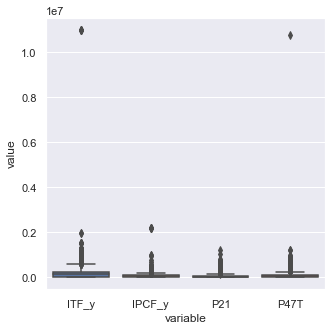

In [85]:
# 4) Verificamos la existencia si hay outliers en las variables de ingresos: ITF_y, IPCF_y, P21, P47T
variables_outliers = ['ITF_y', 'IPCF_y', 'P21', 'P47T']
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_IH[variables_outliers]))

# En el boxplot graficado podemos observar que las variables analizadas contienen outliers por lo que decidimos eliminarlos de la base de datos
Q1 = df_IH[variables_outliers].quantile(0.25)
Q3 = df_IH[variables_outliers].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

mask = (df_IH[variables_outliers] >= limite_inferior) & (df_IH[variables_outliers] <= limite_superior)
df_IH[variables_outliers] = df_IH[variables_outliers][mask]

/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='variable', ylabel='value'>

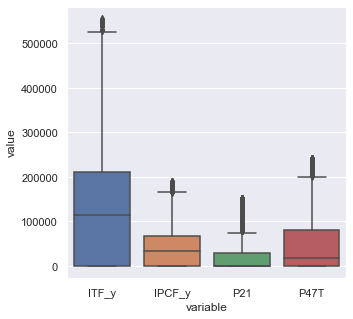

In [86]:
# Repetimos el gráfico anterior para asegurarnos que dichos valores extremos hayan sido eliminados.
variables_outliers = ['ITF_y', 'IPCF_y', 'P21', 'P47T']
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_IH[variables_outliers]))
# Efectivamente, si bien vemos que aún siguen existiendo algunos puntos en los gráficos representando valores por fuera de la distribución estándar, estas observaciones /
# no se alejan tanto de la media del ingreso como sí pasaba en la figura anterior.

In [87]:
# 5)Por último, examinamos el "tipo" de cada variable del dataframe
tipos = df_IH.dtypes
for columna, tipo in tipos.items():
    print(f"Columna '{columna}': {tipo}") 

# Luego, transformamos las variables que correspondan al tipo "categóricas" según el diseño de registro a este "tipo" respectivamente
categóricas = ['IV1','IV3','IV8','V2','V5','CH03','CH04','CH07','CH08','CH09','CH12','NIVEL_ED','ESTADO','CAT_INAC']
df_IH[categóricas] = df_IH[categóricas].astype('category')

# En último lugar, eliminamos a la variable "CH05" y la variable "MAS_500" ya que se encuentran en formato "string"
variables_a_eliminar = ['CH05','MAS_500_y']
df_IH = df_IH.drop(columns=variables_a_eliminar)

Columna 'CODUSU': object
Columna 'NRO_HOGAR': int64
Columna 'COMPONENTE': int64
Columna 'H15': int64
Columna 'CH03': int64
Columna 'CH04': int64
Columna 'CH05': object
Columna 'CH06': int64
Columna 'CH07': int64
Columna 'CH08': float64
Columna 'CH09': int64
Columna 'CH10': int64
Columna 'CH11': int64
Columna 'CH12': int64
Columna 'CH13': int64
Columna 'CH15': int64
Columna 'CH16': int64
Columna 'NIVEL_ED': int64
Columna 'ESTADO': int64
Columna 'CAT_OCUP': int64
Columna 'CAT_INAC': int64
Columna 'PP02C1': int64
Columna 'PP02C2': int64
Columna 'PP02C3': int64
Columna 'PP02C4': int64
Columna 'PP02C5': int64
Columna 'PP02C6': int64
Columna 'PP02C7': int64
Columna 'PP02C8': int64
Columna 'PP02E': int64
Columna 'PP02H': int64
Columna 'PP02I': int64
Columna 'PP03D': float64
Columna 'PP3E_TOT': float64
Columna 'PP3F_TOT': float64
Columna 'PP04B2': float64
Columna 'PP06C': float64
Columna 'PP06D': float64
Columna 'PP08D1': float64
Columna 'PP08D4': float64
Columna 'PP08F1': float64
Columna 'PP0

**Punto 4**

Las carencias físicas o de infraestructura del lugar de residencia se relacionan con las condiciones de pobreza de los hogares. Los hogares pobres suele caracterizarse por tener una **vivienda deficitaria**. El indicador de vivienda deficitaria según el INDEC se construye a partir de las categorías Casa tipo B (si cumple alguna de estas condiciones: tienen piso de tierra, no tienen provisión de agua por cañería dentro de la vivienda, o no disponen de baño con descarga de agua) y vivienda precaria (incluye casillas, piezas en inquilinato, locales no construidos para habitación y viviendas móviles). Las siguientes tres variables nos permiten tener una noción de este déficit de vivienda según lo define el INDEC:

**IV1** Tipo de vivienda: 1 = Casa; 2 = Departamento; 3 = Pieza de inquilinato; 4 = Pieza en hotel/pensión; 5 = Local no construido para habitación.

**IV3** Los pisos interiores son principalmente de...: 1 = Mosaico/baldosa/madera/cerámica/alfombra; 2 = Cemento/ladrillo fijo; 3 = Ladrillo suelto/tierra.

**IV6** Tiene agua...: 1 = por cañería dentro de la vivienda; 2 = fuera de la vivienda pero dentro del terreno; 3 = fuera del terreno. 

**IV10** El baño tiene...: 1 = inodoro con botón / mochila / cadena y arrastre de agua; 2 = inodoro sin botón / cadena y a balde; 3 = letrina (sin arrastre de agua)

Además de estas características, consideramos necesario agregar a la definición de vivienda del INDEC una característica de la ubicación. Consideramos que un entorno inseguro, insalubre o potencialmente riesgoso es algo relevante a la hora de definir la marginalidad de una vivienda:

**IV12_1** La vivienda está ubicada cerca de basural/es (3 cuadras o menos): 1 = Si; 2 = No

**IV12_2** La vivienda está ubicada en zona inundable (en los últimos 12 meses): 1 = Si; 2 = No

**IV12_3** La vivienda está ubicada en villa de emergencia: 1 = Si; 2 = No

Por lo tanto, construiremos una variable de **vivienda marginal** que a la definición de vivienda deficitaria del INDEC le sume si esta se encuentra en alguna de las 3 ubicaciones mencionadas. 

In [88]:
df_IH['Vivienda_marginal'] = 0

mask = (
    (df_IH['IV3'] == 3) | 
    (df_IH['IV6'].isin([2, 3])) | 
    (df_IH['IV10'].isin([2, 3])) | 
    (df_IH['IV1'] == 3) | 
    (df_IH['IV12_1'] == 1)| 
    (df_IH['IV12_2'] == 1)| 
    (df_IH['IV12_3'] == 1)
)

df_IH.loc[mask, 'Vivienda_marginal'] = 1

cant_viv_marg = df_IH['Vivienda_marginal'].sum()
print(f'La cantidad de observaciones con vivienda marginal es: {cant_viv_marg}')

La cantidad de observaciones con vivienda marginal es: 1173


El **hacinamiento**, entendido como la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar, suele ser otro indicador relacionado con la pobreza. El INDEC en sus indicadores socioeconómicos considera la incidencia del hacinamiento crítico, en virtud de las limitaciones que este genera a los miembros de los hogares en materia de privacidad, salud y generación de entornos aptos para el estudio y la socialización. Se consideran hogares con **hacinamiento crítico** aquellos en los que habitan más de tres personas por cuarto. Las siguientes variables permiten tener una noción del hacinamiento:

**II1**: Cuántos ambientes/ habitaciones tiene este hogar para su uso exclusivo?

**IX_TOT** Cantidad de miembros del Hogar

Construimos una variable para conocer el hacinamiento y luego poder determinar si los individuos viven bajo condiciones de hacinamiento crítico.

In [89]:
df_IH['Hacinamiento'] = df_IH['IX_TOT']/df_IH['II1']

cant_hacinamiento_critico = (df_IH['Hacinamiento'] > 3).sum()
print(f'La cantidad de observaciones con hacinamiento mayor a 3 es: {cant_hacinamiento_critico}')

La cantidad de observaciones con hacinamiento mayor a 3 es: 254


Escribir de esta varibale

In [90]:
mask_0 = (
    ((df_IH['CH03'] == 1) & (df_IH['CH12'] == 6)) |
    ((df_IH['CH03'] == 1) & (df_IH['CH12'] == 7)) |
    ((df_IH['CH03'] == 1) & (df_IH['CH12'] == 8)) |
    ((df_IH['CH03'] == 1) & ((df_IH['CH12'].isin([3, 4, 5])) & (df_IH['CH13'] == 1)))
)

mask_1 = (
    ((df_IH['CH03'] == 1) & (df_IH['CH12'] == 1)) |
    ((df_IH['CH03'] == 1) & (df_IH['CH12'] == 2)) |
    ((df_IH['CH03'] == 1) & ((df_IH['CH12'].isin([3, 4, 5])) & (df_IH['CH13'] == 2)))
)

In [ ]:
df_IH["jefe_baja_educ"] = None
# Identificar las observaciones con NAs y con código igual a otras observaciones con uno
obs_na_1 = df_IH[df_IH['jefe_baja_educ'].isna()]
obs_a_cambiar_1 = df_IH[((df_IH['jefe_baja_educ'] == 1) & (df_IH['CODUSU'].isin(obs_na_1['CODUSU']))) |
                ((df_IH['jefe_baja_educ'] == 1) & (df_IH['NRO_HOGAR'].isin(obs_na_1['NRO_HOGAR'])))]

# Alternativa utilizando fillna
df_IH['jefe_baja_educ'] = df_IH.apply(lambda row: 1 if pd.isna(row['jefe_baja_educ']) and ((row['jefe_baja_educ'] == 1 and row['CODUSU'] in obs_na_1['CODUSU'].values) or (row['jefe_baja_educ'] == 1 and row['NRO_HOGAR'] in obs_na_1['NRO_HOGAR'].values)) else row['jefe_baja_educ'], axis=1)

In [77]:
df_IH.loc[mask_1, 'jefe_baja_educ'] = 1
df_IH.loc[mask_0, 'jefe_baja_educ'] = 0
cant_jefe_baja_educ = df_IH['jefe_baja_educ'].sum()

print(f'La cantidad de observaciones que poseen un jefe de hogar de baja educación (secundario incompleto o menos) es: {cant_jefe_baja_educ}')

La cantidad de observaciones que poseen un jefe de hogar de baja educación (secundario incompleto o menos) es: 728.0


In [65]:
df_IH[["jefe_baja_educ","CODUSU","NRO_HOGAR","CH03","CH12"]]

,jefe_baja_educ,CODUSU,NRO_HOGAR,CH03,CH12
1,NaN,TQRMNORVYHMOTSCDEIJAH00802517,1,3,4
2,0.0,TQRMNOSQRHLLTTCDEIJAH00719390,1,1,7
3,NaN,TQRMNOSQRHLLTTCDEIJAH00719390,1,2,7
4,1.0,TQSMNOSQRHLLTTCDEIJAH00719389,1,1,2
5,1.0,TQRMNORTUHKOQQCDEIJAH00780489,1,1,2
6,1.0,TQRMNOUTRHKNQMCDEIJAH00802590,1,1,2
8,0.0,TQRMNOSXXHKMQNCDEIJAH00780852,1,1,4
9,NaN,TQRMNOSXXHKMQNCDEIJAH00780852,1,2,2
10,NaN,TQRMNOSXXHKMQNCDEIJAH00780852,1,3,4
11,NaN,TQRMNOSXXHKMQNCDEIJAH00780852,1,3,4


**Punto 5**

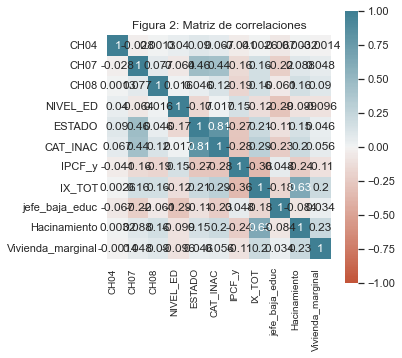

In [14]:
df_d = df_IH[["CH04", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF_y", "IX_TOT", "Hacinamiento", "Vivienda_marginal",  ]].copy()

corr = df_d.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize=10
)
plt.title("Figura 2: Matriz de correlaciones")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')



**Punto 6**

In [ ]:
# Importamos la base de datos "tabla_adultos_equiv.xlsx"
df_adultos = pd.read_excel("tabla_adulto_equiv.xlsx",skiprows=3,nrows=24) 
df_adultos.drop(0, inplace = True)

# Reseteamos el índice 
df_adultos.reset_index(drop=True,inplace=True)
display(df_adultos)

# Definimos las unidades de adulto equivalente para las edades que están agrupadas 
for i in range(0,18):
    df_adultos.loc[i,"Edad"]= i 
#De 18 a 29 años le atribuímos el valor 0.76 a las mujeres y 1.02 a los hombres
for i in range(18,30): 
    df_adultos.loc[i]= [i,0.76,1.02] 
#De 30 a 45 años le atribuímos el valor 0.77 a las mujeres y 1 a los hombres
for i in range(30,46): 
    df_adultos.loc[i]= [i,0.77,1] 
#De 46 a 60 años le atribuímos el valor 0.76 a las mujeres y 1 a los hombres
for i in range(46,61):
    df_adultos.loc[i]= [i,0.76,1] 
#De 61 a 75 años le atribuímos el valor 0.67 a las mujeres y 0.83 a los hombres
for i in range(61,76): 
    df_adultos.loc[i]= [i,0.67,0.83]
# A los mayores de 75 años le atribuímos el valor 0.63 a las mujeres y 0.74 a los hombres
for i in range(76,106): 
    df_adultos.loc[i]= [i,0.63,0.74] 

df_adultos = df_adultos.rename(columns={"Edad":"CH06"})
print(df_adultos)

# Armamos una base de datos para las mujeres y otras para los varones
df_equiv_mujeres = df_adultos[["CH06","Mujeres"]].copy()
df_equiv_mujeres["CH04"] = 2 #El 2 implica que son mujeres según la variable CH04 de la EPH
df_equiv_mujeres = df_equiv_mujeres.rename(columns={"Mujeres":"adulto_equiv"})
display(df_equiv_mujeres)

df_equiv_varones = df_adultos[["CH06","Varones"]].copy()
df_equiv_varones["CH04"] = 1 #El 1 implica que son varones según la variable CH04 de la EPH
df_equiv_varones = df_equiv_varones.rename(columns={"Varones":"adulto_equiv"})
display(df_equiv_varones)

# Unimos las dos bases creadas anteriormente. Luego juntamos la nueva base con la EPH
df_equiv_total = pd.concat([df_equiv_mujeres, df_equiv_varones], ignore_index=True)
display(df_equiv_total)
df_IH2 = df_IH.merge(df_equiv_total, on=["CH06","CH04"], how = "left")

# Chequeamos que haya dado bien
print(df_IH2[["CH06","CH04","adulto_equiv"]].head(10))

# Sumamos la nueva columna "adulto_equiv" para todas las personas que pertenecen al mismo hogar
df_IH3 = df_IH2.groupby(["NRO_HOGAR","CODUSU"]).agg({"adulto_equiv":"sum"})
df_IH3.reset_index(inplace = True)
df_IH3 = df_IH3.rename(columns={"adulto_equiv":"ad_equiv_hogar"})
df_IH_final = df_IH2.merge(df_IH3, on=["NRO_HOGAR","CODUSU"], how = "left")

In [ ]:
# Encontramos a las personas que no respondieron cual es su ITF y los diferenciamos en otra base de datos
cant_ITF_missing = (df_IH_final['ITF_y'] == 0).sum()
print("La cantidad de personas que no reportaron su ITF es",cant_ITF_missing)

# Hacemos una base de datos con las personas que reportaron su ITF y otra con las que no lo hicieron
respondieron = df_IH_final[df_IH_final['ITF_y']!= 0]
norespondieron = df_IH_final[df_IH_final['ITF_y']== 0]

# Chequeamos que los Data Frames se hayan creado correctamente y reseteamos su índice
respondieron.reset_index(inplace = True)
norespondieron.reset_index(inplace = True)
print(respondieron['ITF_y'].head(5))
print(norespondieron['ITF_y'].head(5))

In [ ]:
# Agregamos la columna de "ingreso necesario" al Data Frame de "respondieron"
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*(57371.05)

# Generamos una columna nueva llamada "pobre" para identificar a aquellos que no alcanzan el ingreso necesario
respondieron['pobre'] = (respondieron['ITF_y'] < respondieron['ingreso_necesario']).astype(int)
print(respondieron[['ITF_y','ingreso_necesario','pobre']])

**Punto 7**

In [ ]:
#Nos quedamos con una sola observación por hogar, y usando el ponderador para expandir la muestra, guardamos el total de pobres y no pobres en un data frame
contador_pobreza = respondieron.groupby(['CODUSU', 'NRO_HOGAR'])\
                 .agg({'pobre': 'mean', 'PONDIH_y': 'sum'}) \
                 .groupby('pobre')['PONDIH_y'] \
                 .sum() \
                 .reset_index() \
                 .rename(columns={'PONDIH_y': 'tot_PONDIH_y'})

# Calculamos la tasa de pobreza
cant_pobres = contador_pobreza.loc[1,'tot_PONDIH_y']
total_pob = contador_pobreza['tot_PONDIH_y'].sum()
tasa_pobreza_GBA = cant_pobres / total_pob
print("La tasa de hogares debajo de la línea de pobreza en esta muestra es de:", round(tasa_pobreza_GBA*100,2), "%")

# La tasa de hogares debajo de la línea de pobreza es mayor que la que reporta el INDEC de 30,3% en el primer semestre de 2023
# En particular, la diferencia entre ambas tasas es de 9.5%.

## Parte 2: Construcción de funciones

**Parte 1**

In [ ]:
def evalua_metodo(X_train, X_test, y_train, y_test, model, k=3, hiperparam=1, random_state=None, p=None, mp = 5):
    '''
    La función evalua_metodo ajusta primero el modelo con los datos de entrenamiento (según el método elegido) y realiza las predicciones sobre la muestra de prueba.
    Luego calcula y devuelve las siguientes métricas (para el método elegido -Regresión logística, Análisis de discriminante lineal, KNN-): 
    - Matriz de confusión
    - Valores de AUC
    - Accuracy score 
    - False Negative Rate
    - True Negative Rate
    - False Positve Rate
    - True Positive Rate
    También agregamos el Error Cuadrático Medio, necesario para el método de cross-validation.
    Cuando el método es regresión logística, la función también devuelve los coeficientes estimados para cada variable.
    Lo anterior permite identificar los coeficientes nulos y, por lo tanto, qué variables son relevantes según LASSO o Ridge.
    Obs: para la regresión logística tenemos en cuenta el parámetro de regularización para las funciones siguientes. 
    '''
    coeficientes=None
    
    if p is not None:
        penalty = p
   
    if model==KNeighborsClassifier:
        
        y = model(n_neighbors=k).fit(X_train, y_train)
        
    elif model== LogisticRegression:
        
        y = model(C=1/hiperparam, penalty = p, solver = 'saga', random_state = random_state).fit(X_train, y_train)
        coef = y.coef_
        coef_column = coef.reshape((-1, 1))
        
        coeficientes = pd.DataFrame(coef_column, index= X_train.columns)
        coeficientes = coeficientes.reset_index()
        coeficientes = coeficientes.set_axis(['Variable', 'Coeficiente'], axis=1)
   
    elif model== DecisionTreeClassifier:
        
        y = model(max_depth = mp).fit(X_train, y_train)

    elif model== LinearDiscriminantAnalysis:
        
        y = model().fit(X_train, y_train)
        
    else:
        
        y = model.fit(X_train, y_train)
    
    y_pred = y.predict(X_test)
      
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fnr = fn/(tp+fn)
    tnr =tn/(fp+tn)
    fpr2 = fp/(fp+tn)
    tpr2 = tp/(tp+fn)
    ecm = mean_squared_error(y_test, y_pred)
    prec = tp/(tp+fp)

    metricas = pd.DataFrame({'Modelo':[model],
        'Matriz de Confusión': [matriz_confusion],
        'AUC': [auc],
        'Accuracy Score': [accuracy],
        'False Negative Rate': [fnr],
        'True Negative Rate': [tnr],
        'False Positve Rate': [fpr2],
        'True Positive Rate': [tpr2],
        'ECM':[ecm],
        'Precision': [prec]
    })

    return metricas, coeficientes

**Punto 2**

In [ ]:
def cross_validation(model, k_cv, x, y, standard=False, random_state = None):
    ''' 
    La función cross_validation realiza la validación cruzada con k_cv iteraciones.
    Contiene la opción de estandarización (el default es False). Si se aplica la estandarización, los conjuntos de datos x_train y x_test se estandarizan utilizando el StandardScaler creado. 
    La función llama a la función evalua_metodo en cada iteración (para las k_cv distintas particiones). Así, realiza la validación cruzada para el método elegido (Regresión logística, Análisis de discriminante lineal o KNN).
    La función devuelve el ECM promedio y los ECM de las k_cv estimaciones realizadas por el método de cross-validation. 
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
    sc = StandardScaler()
    
    if standard==True:
    
        kf = KFold(n_splits=k_cv, shuffle=True, random_state=random_state)

        ecms = []
        coefs = []

        for i, (train_index, test_index) in enumerate(kf.split(x)):   
            x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]  
            y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

            x_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
            x_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)

            resultado_matriz = evalua_metodo(x_train_transformed, x_test_transformed, y_train, y_test, model, random_state)[0]
            ecm = resultado_matriz['ECM'][0]
            ecms.append(ecm)
            
        mean_ecms = statistics.mean(ecms)

        return mean_ecms, ecms

**Punto 3**

In [ ]:
def evalua_config(hiperparam, k_cv, x, y, k_knn, depth_range, l1=3, random_state=None):
    '''
    La función evalua_config toma una lista de valores de hiperparámetros y las k_cv particiones para cross-validation. Para cada valor del hiperparámetro, crea un clasificador de regresión logística.
    Para evaluar ese clasificador usando la estandarización de los datos (standard=True).
    Luego utiliza la función cross_validation para el caso en que el método de regularización sea LASSO (l1=1), Ridge (l1=0) o una comparación entre ambos (l1=3 - default).
    
    Para los casos en los que se evalúan LASSO y Ridge por separado, la función devuelve el hiperparámetro óptimo (con menor ECM) e indica si estamos usando LASSO o Ridge. 
    Además devuelve un diccionario, donde las "key" son los hiperparámetros evaluados y los valores corresponden a la distribución de los ECM en cada partición.
    En el caso de LASSO, también se devuelve los coeficientes de las variables X para cada hiperparámetro considerado.
    
    En el caso en el que se compara entre LASSO y Ridge, la función determina cuál es el hiperparámetro que minimiza el ECM entre los dos métodos de regularización, indica el método asociado a ese hiperparámetro y 
    devuelve un diccionario donde la "key" es un hiperparámetros y su valor es el promedio de los ECM asociado a ese hiperparámetro.
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
    config_optimo_LASSO = {}
    config_optimo_Ridge = {}
    
    config_optimo_LASSO2 = {}
    config_optimo_Ridge2 = {}
    
    distribucion_LASSO = {}
    distribucion_Ridge = {}
    coeficientes_LASSO = {}
    
    config_optimo_knn = {}
    config_optimo_dtc = {}

    min_LASSO2 = None
    min_Ridge2 = None 
    
    for config in hiperparam:
        if l1 == 1:
            clasificador_LASSO = LogisticRegression(C=1/config, penalty="l1", solver="saga", random_state=random_state)
            resultado_cv_LASSO = cross_validation(clasificador_LASSO, k_cv, x, y, standard=True, random_state=random_state)

            ecms_LASSO = resultado_cv_LASSO[0]
            config_optimo_LASSO[config] = ecms_LASSO

            distribucionL = resultado_cv_LASSO[1]
            distribucion_LASSO[config] = distribucionL     

        elif l1 == 0:
            clasificador_Ridge = LogisticRegression(C=1/config, penalty="l2", solver="saga", random_state=random_state)
            
            resultado_cv_Ridge = cross_validation(clasificador_Ridge, k_cv, x, y, standard=True, random_state=random_state)
            ecms_Ridge = resultado_cv_Ridge[0]
            config_optimo_Ridge[config] = ecms_Ridge
            
            distribucionR = resultado_cv_Ridge[1]
            distribucion_Ridge[config] = distribucionR

        else:
            clasificador_LASSO2 = LogisticRegression(C=1/config, penalty="l1", solver="saga", random_state=random_state)
            ecms_LASSO2 = cross_validation(clasificador_LASSO2, k_cv, x, y, standard=True, random_state=random_state)[0]
            config_optimo_LASSO2[config] = ecms_LASSO2
            
            clasificador_Ridge2 = LogisticRegression(C=1/config, penalty="l2", solver="saga", random_state=random_state)
            ecms_Ridge2 = cross_validation(clasificador_Ridge2, k_cv, x, y, standard=True, random_state=random_state)[0]
            config_optimo_Ridge2[config] = ecms_Ridge2
            
    if bool(config_optimo_LASSO2) and bool(config_optimo_Ridge2):
        min_LASSO2 = min(config_optimo_LASSO2.items(), key=lambda x: x[1])
        min_Ridge2 = min(config_optimo_Ridge2.items(), key=lambda x: x[1])
        ecm_min = min(min_LASSO2[1], min_Ridge2[1])
        if ecm_min == min_LASSO2[1]:
            config_optimo = min_LASSO2[0]
        else: 
            config_optimo = min_Ridge2[0]

    for k in k_knn:
        resultado_cv_knn = cross_validation(KNeighborsClassifier,k_cv, x, y, standard= True, random_state = random_state)
        ecms_knn = resultado_cv_knn[0]
        config_optimo_knn[config] = ecms_knn
        
    for depth in depth_range:
        resultado_cv_dtc = cross_validation(DecisionTreeClassifier,k_cv, x, y, standard= True, random_state = random_state)
        ecms_dtc = resultado_cv_dtc[0]
        config_optimo_dtc[config] = ecms_dtc
        
    if l1 == 0:
        return min(config_optimo_Ridge, key=config_optimo_Ridge.get), 'Ridge', distribucion_Ridge, min(config_optimo_knn, key=config_optimo_knn.get), min(config_optimo_dtc, key=config_optimo_dtc.get)
    elif l1 == 1:
        return min(config_optimo_LASSO, key=config_optimo_LASSO.get), 'LASSO', distribucion_LASSO, coeficientes_LASSO, min(config_optimo_knn, key=config_optimo_knn.get), min(config_optimo_dtc, key=config_optimo_dtc.get)
    else:
        if config_optimo == min_LASSO2[0]:
            return config_optimo, 'LASSO', config_optimo_LASSO2, config_optimo_Ridge2, min(config_optimo_knn, key=config_optimo_knn.get), min(config_optimo_dtc, key=config_optimo_dtc.get),
        else:
            return config_optimo, 'Ridge', config_optimo_Ridge2, config_optimo_LASSO2, min(config_optimo_knn, key=config_optimo_knn.get), min(config_optimo_dtc, key=config_optimo_dtc.get)

**Punto 4**

In [ ]:
def evalua_multiples_metodos (k_cv, k_KNN, hiperparams, x_train, x_test , y_train, y_test, x, y, random_state=None):
    '''
    La función "evalua_multiples_metodos" evalúa los modelos de Regresión Logística, Análisis de Discriminante Lineal y K-Nearest Neighbors. 
    Toma como input el número de particiones de cross-validation, el número de vecinos cercanos, un conjunto de hiperparámetros y datos de entrenamiento y test.
    Luego, realiza un loop sobre los modelos dados, ajusta cada modelo según el tipo y los parámetros requeridos y evalúa su desempeño utilizando métricas como AUC, precisión, tasas de falsos positivos y negativos, y ECM. 
    Finalmente, organiza los resultados en un DataFrame que contiene las métricas de evaluación de cada modelo con sus respectivos hiperparámetros.
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
       
    modelos = ['Regresión logística','Análisis de discriminante lineal','KNN','Arbol de decisión']
       
    columnas=["Modelo", "Hiperparametro", "AUC", "Accuracy", "False Negative Rate", "True Negative Rate", "False Positve Rate", "True Positive Rate", "ECM","Precision","k_KNN"]
    matriz = pd.DataFrame(columns=columnas)
    
    for modelo in modelos:
    
        if modelo == 'Regresión logística':
            hiperparam_optimo_RL = evalua_config(hiperparams, k_cv, x, y, k_KNN, depth_range, 3, random_state)[:2] 
            metricas_RL= evalua_metodo(x_train, x_test, y_train, y_test, LogisticRegression, hiperparam_optimo_RL[0], random_state)[0]
            resultados = [modelo, hiperparam_optimo, metricas_RL['AUC'][0], metricas_RL['Accuracy Score'][0], metricas_RL['False Negative Rate'][0], metricas_RL['True Negative Rate'][0], metricas_RL['False Positve Rate'][0], metricas_RL['True Positive Rate'][0], metricas_RL['ECM'][0], metricas_RL['Precision'][0]]
            matriz.loc[len(matriz)] = resultados
    
        elif modelo == 'Análisis de discriminante lineal':
            metricas_adl = evalua_metodo(x_train, x_test, y_train, y_test, LinearDiscriminantAnalysis, random_state)[0]
            resultados = [modelo,'NA', metricas_adl['AUC'][0], metricas_adl['Accuracy Score'][0], metricas_adl['False Negative Rate'][0], metricas_adl['True Negative Rate'][0], metricas_adl['False Positve Rate'][0], metricas_adl['True Positive Rate'][0], metricas_adl['ECM'][0], metricas_adl['Precision'][0]]
            matriz.loc[len(matriz)] = resultados
                      
        elif modelo == 'KNN':
            hiperparam_optimo_KNN = evalua_config(hiperparams, k_cv ,x, y, k_KNN, depth_range, 3, random_state)[4] 
            metricas_knn = evalua_metodo(x_train, x_test, y_train, y_test, KNeighborsClassifier, hiperparam_optimo_KNN, random_state)[0]
            resultados = [modelo, k_KNN, metricas_knn['AUC'][0], metricas_knn['Accuracy Score'][0], metricas_knn['False Negative Rate'][0], metricas_knn['True Negative Rate'][0], metricas_knn['False Positve Rate'][0], metricas_knn['True Positive Rate'][0], metricas_knn['ECM'][0], metricas_knn['Precision'][0]]
            matriz.loc[len(matriz)] = resultados  
                       
        elif modelo == 'Arbol de decisión':
            hiperparam_optimo_DTC = evalua_config(hiperparams, k_cv ,x, y, k_KNN, depth_range, 3, random_state)[5] 
            metricas_dtc = evalua_metodo(x_train, x_test, y_train, y_test,DecisionTreeClassifier, hiperparam_optimo_DTC, random_state)[0]
            resultados = [modelo, depth_range, metricas_dtc['AUC'][0], metricas_dtc['Accuracy Score'][0], metricas_dtc['False Negative Rate'][0], metricas_dtc['True Negative Rate'][0], metricas_dtc['False Positve Rate'][0], metricas_dtc['True Positive Rate'][0], metricas_dtc['ECM'][0], metricas_dtc['Precision'][0]]
            matriz.loc[len(matriz)] = resultados  
    
    return matriz